In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [36]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
train_data.shape, test_data.shape, isinstance(np.array(test_targets), tf.Tensor), test_targets.shape

((404, 13), (102, 13), False, (102,))

In [16]:
mean = train_data.mean(axis=0)
std = train_data.std(axis = 0)
train_data -= mean
test_data -= mean
train_data /= std
test_data /= std

In [34]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(1)
    ])

    model.compile(
        optimizer = 'rmsprop',        
        loss = 'mse',
        metrics = ['mae']
    )

    return model

In [35]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"Processing fold #{i}")
    x_val = train_data[i*num_val_samples: (i+1)*num_val_samples]
    y_val = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    partial_x_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis = 0)
    partial_y_data = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis = 0)
    model = build_model()
    model.fit(partial_x_data, partial_y_data, epochs = num_epochs, batch_size = 16, verbose = 0)
    val_mse, val_mae = model.evaluate(x_val, y_val)
    all_scores.append(val_mae)
all_scores

Processing fold #0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32.3462 - mae: 4.4275 
Processing fold #1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.4240 - mae: 3.9439 
Processing fold #2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.9484 - mae: 5.5827 
Processing fold #3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44.6265 - mae: 4.8343 


[4.145338535308838, 3.760014295578003, 5.440762519836426, 4.4742560386657715]

In [57]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []

for i in range(k):
    print(f"Processing fold #{i}")
    x_val = train_data[i*num_val_samples: (i+1)*num_val_samples]
    y_val = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    partial_x_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis = 0)
    partial_y_data = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis = 0)
    model = build_model()
    history = model.fit(partial_x_data, partial_y_data, validation_data = (x_val, y_val), epochs = num_epochs, batch_size = 16, verbose = 0)
    mae_history = history.history['val_mae']
    all_scores.append(mae_history)
all_scores

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


[[5.6555891036987305,
  5.4644551277160645,
  12.24724292755127,
  5.06484842300415,
  14.174757957458496,
  15.21764087677002,
  6.19500207901001,
  6.554774284362793,
  13.490943908691406,
  8.97021770477295,
  8.005062103271484,
  4.739936351776123,
  6.375344276428223,
  5.643167495727539,
  4.495551586151123,
  4.783758163452148,
  8.994418144226074,
  6.030431270599365,
  6.184248447418213,
  10.159672737121582,
  8.094334602355957,
  5.792625427246094,
  4.293127059936523,
  4.364561557769775,
  6.824072360992432,
  4.264199256896973,
  4.504947662353516,
  4.399055480957031,
  6.27509069442749,
  11.420598983764648,
  4.487897872924805,
  4.836355209350586,
  4.140667915344238,
  5.106100082397461,
  4.601133346557617,
  5.080384731292725,
  4.592425346374512,
  4.406181812286377,
  4.327421188354492,
  4.0517778396606445,
  5.666617393493652,
  4.305749416351318,
  4.057336330413818,
  4.397335052490234,
  4.657792091369629,
  4.2030158042907715,
  4.379957675933838,
  5.62098

In [58]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]
np.array(average_mae_history).shape, average_mae_history

((500,),
 [np.float64(8.859562039375305),
  np.float64(6.254388928413391),
  np.float64(9.947394490242004),
  np.float64(6.794483065605164),
  np.float64(9.255187392234802),
  np.float64(11.016065955162048),
  np.float64(6.462831020355225),
  np.float64(8.363028526306152),
  np.float64(7.8613409996032715),
  np.float64(8.698311686515808),
  np.float64(6.786015152931213),
  np.float64(4.988298058509827),
  np.float64(7.660281300544739),
  np.float64(5.508377909660339),
  np.float64(5.473883509635925),
  np.float64(6.745735764503479),
  np.float64(7.586572647094727),
  np.float64(8.725122570991516),
  np.float64(5.261165499687195),
  np.float64(8.23505175113678),
  np.float64(6.6426780223846436),
  np.float64(5.416333913803101),
  np.float64(6.05696964263916),
  np.float64(5.99931013584137),
  np.float64(8.71839427947998),
  np.float64(4.968545198440552),
  np.float64(6.999064803123474),
  np.float64(7.288212895393372),
  np.float64(6.23797082901001),
  np.float64(6.296818494796753),
  n

In [59]:
average_mae_history = np.mean(all_scores, axis = 0)
np.array(average_mae_history).shape, average_mae_history

((500,),
 array([ 8.85956204,  6.25438893,  9.94739449,  6.79448307,  9.25518739,
        11.01606596,  6.46283102,  8.36302853,  7.861341  ,  8.69831169,
         6.78601515,  4.98829806,  7.6602813 ,  5.50837791,  5.47388351,
         6.74573576,  7.58657265,  8.72512257,  5.2611655 ,  8.23505175,
         6.64267802,  5.41633391,  6.05696964,  5.99931014,  8.71839428,
         4.9685452 ,  6.9990648 ,  7.2882129 ,  6.23797083,  6.29681849,
         5.78633177,  5.4700824 ,  5.17296338,  5.43603641,  5.26277262,
         5.814726  ,  5.0514105 ,  4.89319885,  7.29977798,  5.50467038,
         6.32601488,  5.59488595,  5.73252416,  4.57716513,  4.47431511,
         5.18845773,  5.11356431,  4.81164718,  5.79677671,  4.72154182,
         6.43256688,  5.16089404,  4.52052402,  4.54977107,  4.52294093,
         7.18492329,  5.28523976,  5.07346243,  6.19021803,  5.41095072,
         4.72696984,  4.83225501,  4.69158679,  5.2874921 ,  5.16390896,
         4.70279324,  5.68720478,  4.47690

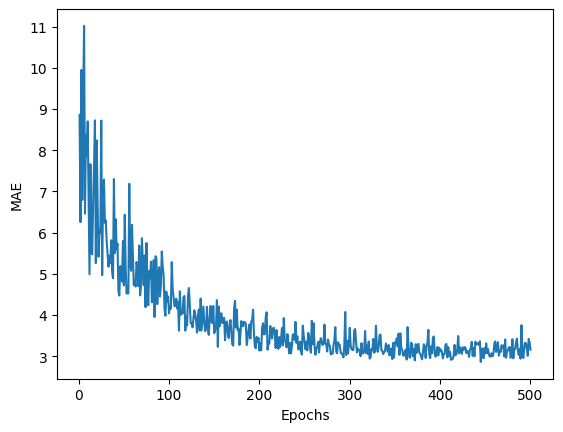

In [60]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

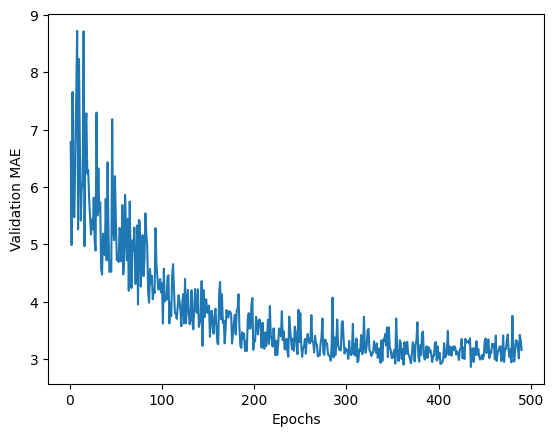

In [61]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [62]:
model = build_model()
model.fit(train_data, train_targets,
epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 106.0302 - mae: 8.8303


9.076545715332031